In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Generate a 2D dataset
X = 10 * np.random.randn(100, 2) + 6
print(X)



[[  1.28155028  25.8258772 ]
 [  0.66036093  11.32661634]
 [ 13.87015606  12.50598786]
 [  7.00666047  15.30854242]
 [ -0.07909004   5.33845618]
 [-11.38631368  23.48362057]
 [ -3.14860394  -1.04800878]
 [ 11.52580258   9.61935433]
 [  2.4377325   22.7658247 ]
 [ 11.41858262  -4.38449874]
 [ 10.11500758   4.24025178]
 [  3.35658613   2.94975431]
 [ 12.27505208   6.29642171]
 [  1.33403069  -1.6187001 ]
 [ 14.05787131  -3.50320461]
 [ 20.78053776  12.34380276]
 [ 11.11913961   3.54517063]
 [ -3.08656601  15.73113768]
 [  8.44594279   6.53311631]
 [ 10.08356454  18.52037003]
 [ 13.38332756  12.4246673 ]
 [ -6.41335852  15.85634661]
 [  6.58856761   7.55510862]
 [  5.68237951  -4.25343528]
 [  2.89750021  15.75453695]
 [  5.19524966   9.66163639]
 [  5.91317518  19.68768252]
 [ -5.07112326  18.09540179]
 [ 25.98815501  10.72717868]
 [  2.5740713   13.19114607]
 [  6.71846303  14.41862503]
 [  5.83109613   0.97107503]
 [ 23.2222021   -3.29857776]
 [  6.88003308  16.19447494]
 [ -0.26089948

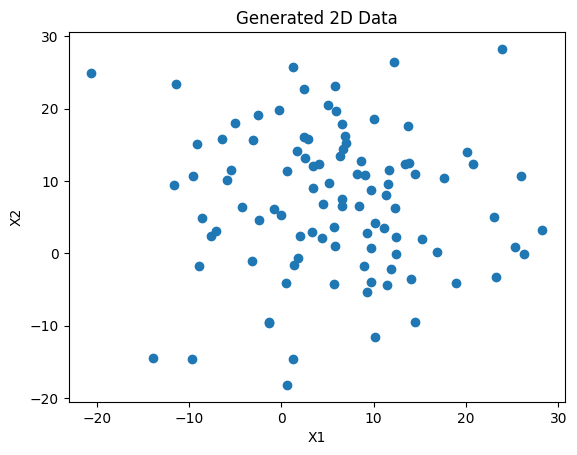

In [ ]:
# Plot the dataset
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Generated 2D Data')
plt.show()


In [ ]:
# Define the model with 3 clusters
kmeans_model = KMeans(n_clusters=3)

# Train the model
kmeans_model.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

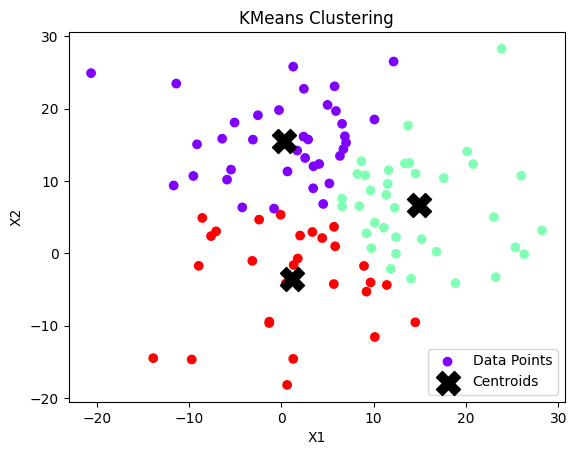

In [ ]:
# Visualize the clustering
plt.scatter(X[:, 0], X[:, 1], c=kmeans_model.labels_, cmap='rainbow', label="Data Points")
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c='black', marker='X', label="Centroids")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


In [ ]:
# Display the cluster centers
cluster_centers = kmeans_model.cluster_centers_
print("Cluster Centers:\n", cluster_centers)


Cluster Centers:
 [[ 0.30743851 15.59246739]
 [14.88611796  6.67227525]
 [ 1.15512521 -3.52785317]]


In [ ]:
# Calculate inertia
inertia = kmeans_model.inertia_
print("Inertia:", inertia)


Inertia: 8342.44452888223


In [ ]:
# Calculate the silhouette score
silhouette_score = metrics.silhouette_score(X, kmeans_model.labels_)
print("Silhouette Score:", silhouette_score)


Silhouette Score: 0.317998960635677


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

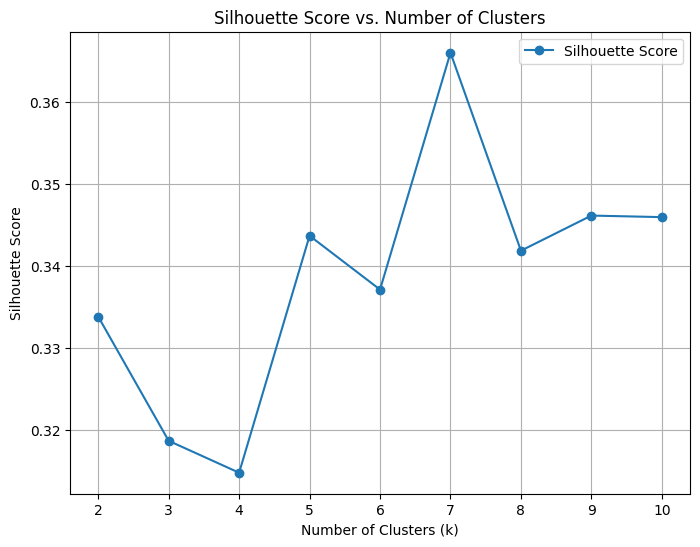

In [ ]:
# Define a range of k values to explore
k_range = range(2, 11)

# Lists to store silhouette scores and inertia values
silhouette_scores = []
inertia_values = []

# Iterate over the range of k values
for k in k_range:
    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    # Calculate and store silhouette score
    silhouette_score = metrics.silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_score)

    # Calculate and store inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

# Silhouette Score Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()




<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

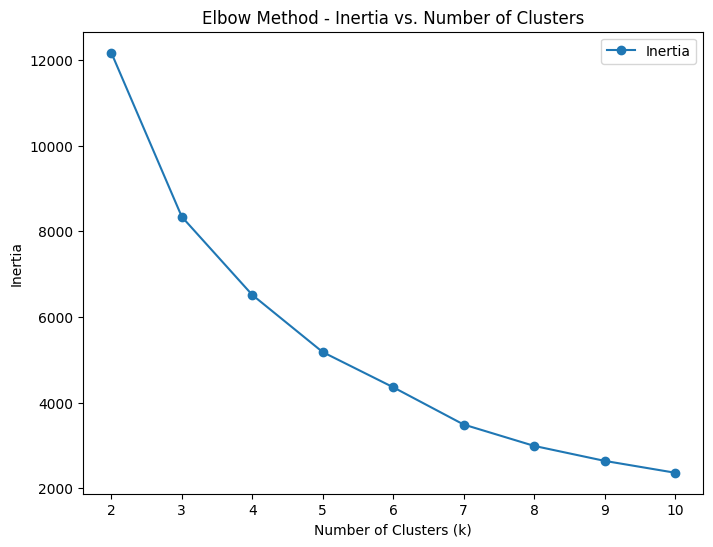

In [ ]:
# Elbow Plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia vs. Number of Clusters')
plt.legend()
plt